# Procesamiento de Imágenes Digitales

Visión Computacional 2018-19 <br>
Practica 1. 3
de octubre de 2018

Este enunciado está en el archivo "PracticaPI2018.ipynb" o su versión "pdf" que puedes encontrar en el Aula Virtual.

## Objetivos


Los objetivos de esta práctica son:
* Programar algunas de las rutinas de transformaciones puntuales de procesamiento de imágenes y analizar el resultado de su aplicación.
* Repasar algunos conceptos de filtrado de imágenes y programar algunas rutinas para suavizado y extracción de bordes.
* Implementar un algoritmo de segmentación de imágenes y otro de extracción de líneas mediante la transformada de Hough.

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:
* Python 2.7 ó 3.X 
* Jupyter http://jupyter.org/.
* Los paquetes "pip" y  "PyMaxFlow"
* Las librerías científicas de Python: NumPy, SciPy, y Matplotlib.
* El paquete PyGame.
* La librería OpenCV.

Las versiones preferidas del entorno de trabajo puedes consultarlas en el Aula Virtual en el archivo "ConfiguracionPC2018.txt". 

El material necesario para la práctica se puede descargar del Aula Virtual.

## Condiciones

* La fecha límite de entrega será el martes 23 de octubre a las 23:55.
* La entrega consiste en dos archivos con el código, resultados y respuestas a los ejercicios:
  1. Un "notebook" de Jupyter con los resultados. Las respuestas a los ejercicios debes introducirlas en tantas celdas de código o texto como creas necesarias, insertadas inmediatamente después de  un enuciado y antes del siguiente.
  2. Un documento "pdf" generado a partir del fuente de Jupyter, por ejemplo usando el comando ``jupyter nbconvert --execute --to pdf notebook.ipynb``, o simplemente imprimiendo el "notebook" desde el navegador en la opción del menú "File->Print preview". Asegúrate de que el documento "pdf" contiene todos los resultados correctamente ejecutados.
* Esta práctica puede realizarse en parejas.

## Instala el entorno de trabajo

En la distribución Linux Ubuntu 18.04, éstos son los comandos necesarios para instalar el entorno:
1. Instala los paquetes Python y Jupyter

    ``apt install python
    apt install python-scipy
    apt install python-numpy
    apt install python-matplotlib
    apt install python-opencv
    apt install jupyter
    apt install jupyter-nbconvert``

    Para para trabajar con la versión 3.X de Python, basta sustituir la palabra "python" por "python3" en los comandos anteriores.

2. Instala el paquete PyMaxflow

   ``pip install PyMaxflow`` o ``pip3 install PyMaxflow``
   
   Si no tienes el paquete "pip" debes instalarlo: ``apt install python-pip`` o ``apt install python3-pip``
3. Instala el paquete "pygame"

    ``apt install python-pygame`` 
    
    Si deseas trabajar en Python 3.X, la versión 18.04 de Ubuntu no tiene el paquete "python3-pygame" pero puedes instalarlo con la herramienta pip: ``pip3 install pygame``

## Transformaciones puntuales

En este apartado te recomiendo que uses al menos la imagen indicada, que puedes encontrar en el directorio de imágenes
del aula virtual. También puedes probar con otras que te parezcan interesantes.

**Ejercicio 1.** Carga la imagen ``escilum.tif``. Calcula
y muestra su histograma, por ejemplo,  con la función ``hist()`` de
``matplotlib.pyplot``. A la vista del histograma, discute
qué problema tiene la imagen para analizar visualmente la
región inferior izquierda.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

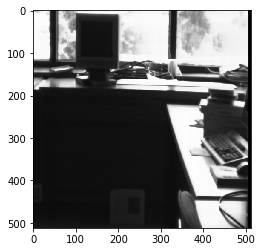

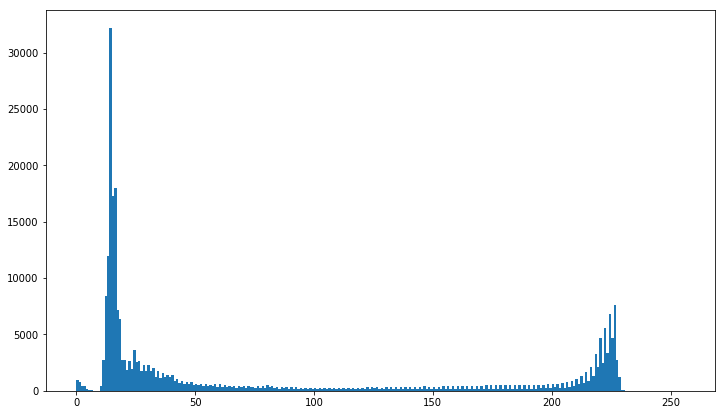

In [2]:
imgName='images/escilum.tif'

img = plt.imread(imgName)

plt.imshow(img, cmap='gray')

bins = list(range(0,256+1))

plt.figure(figsize=(12,7))

histogram = plt.hist(img.flatten(), bins=bins)

plt.show()

El problema es que la imagen tiene una distribución de los niveles de gris muy mala. Los niveles de gris de los píxeles de la imagen están concentrados principalmente en dos rangos muy pequeños: un rango oscuro con niveles de gris entre 10 y 30 y un rango claro con niveles de gris entre 210 y 230. En concreto la esquina inferior es una zona oscura, y aunque hay hay partes diferenciables con distintos niveles de gris, al estar esos niveles en un rango tan pequeño no hay contraste suficiente para distinguirlas a simple vista y sin esfuerzo.

**Ejercicio 2.** Escribe una función ``eq_hist(histograma)``
que calcule la función de transformación puntual que ecualiza el histograma.
Aplica la función de transformación a la imagen anterior.
Calcula y muestra nuevamente el histograma y la imagen
resultantes, así como la función de transformación.

Discute los resultados obtenidos. ¿Cuál sería el resultado si volviésemos a ecualizar la imagen resultante?

En este ejercicio tienes que implementar la función que ecualiza el histograma. No puedes usar funciones que lo hagan por ti.

In [3]:
def eq_hist(histogram):

    values, _, _ = histogram

    cs = np.cumsum(values)

    f = [int(round(255*cs[i]/cs[255])) for i in range(256)]
    
    return f

In [4]:
def eq_img(img, histogram):
    
    func = eq_hist(histogram)

    equalize_img = np.vectorize(lambda i: func[int(i)])

    imgeq = equalize_img(img)

    plt.figure(figsize=(12,7))

    new_histogram = plt.hist(imgeq.flatten(), bins=bins)

    plt.show()

    plt.imshow(imgeq, cmap='gray')

    plt.figure(figsize=(10,5))

    plt.plot(func)
    
    return imgeq, new_histogram, func

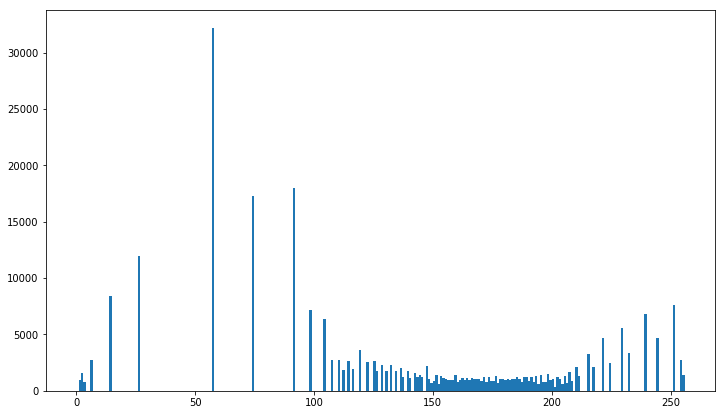

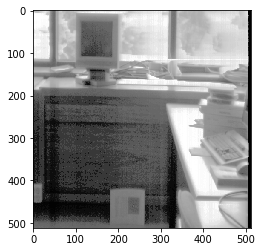

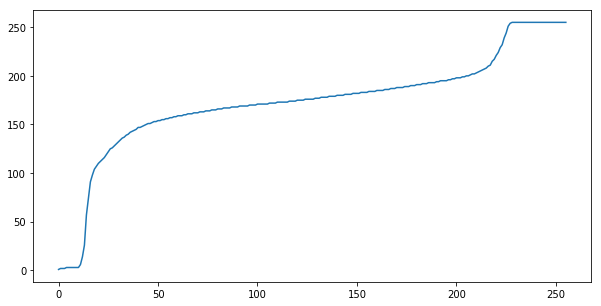

In [5]:
img2,hist2,func2 = eq_img(img, histogram)

Al ecualizar la imagen, la nueva distribución de los niveles de gris es más uniforme (lo más uniforme que puede ser manteniendo la monotonía de los niveles de gris y asegurándose que todos los píxeles con un mismo nivel de gris en la imagen original siguen teniendo un nivel de gris igual en la imagen ecualizada). Como resultado, ahora hay más contraste entre las partes de la imagen que antes eran complicadas de discernir por tener niveles de gris muy parecidos, y ahora se aprecian mejor a simple vista.

Esto sin embargo tiene dos efectos adversos. Por un lado se aprecia más el ruido de la imagen en esas zonas donde antes los niveles de gris se concentraban en un rango muy pequeño, como en la parte inferior izquierda o en la pantalla del ordenador. Y por otro, el rango de niveles de gris que había en la imagen original entre esos dos rangos muy oscuro y muy claro, se ha concentrado en un rango más pequeño, de forma que algunas partes de la imagen con niveles de gris intermedios que antes se apreciaban muy bien ahora se ven con menos claridad o contraste. Un ejemplo de estos son las sombras y reflejos en la mesa.

Si se vuelve a equalizar la imagen resultante, el resultado es el mismo. En el caso continuo está claro: la distribución resultante ya es uniforme, y además es fácil comprobar analíticamente que la función de ecualización es idempotente. En el caso discreto, podría no estar tan claro que el resultado es necesariamente el mismo, y podría pensarse que debido a las aproximaciones necesarias para discretizar podría ser ligeramente distinto (aunque siempre muy similar, y estabilizándose tras un par de ecualizaciones consecutivas). Sin embargo es fácil convencerse de que no, de que también es el mismo necesariamente.

Consideremos por ejemplo un valor de gris $k$, que en el la imagen ecualizada le corresponden $n_k$ píxeles. Habrá un máximo valor de gris $j$ al que la función de transformación le asigna el valor $k$. Denotemos $h_1$ a la función que asigna a cada nivel de gris el número de píxeles con ese valor en la imagen original, $h_2$ a la función análoga en la imagen equalizada, $f$ a la función de transformación entre las dos imágenes, y $g$ a la función de transformación que ecualiza la nueva imagen, que queremos ver que es la identidad. Recordamos que $f$ se define como $f(x) = 255*\frac{\sum_{i=0}^x{h_1(i)}}{\sum_{i=0}^{255}{h_1(i)}}$, y $g$ igual pero con $h_2$. Entonces está claro que $f$ es monótona, que $\sum_{i=0}^j{h_1(i)} = \sum_{i=0}^k{h_2(i)}$, y que $\sum_{i=0}^{255}{h_1(i)} = \sum_{i=0}^{255}{h_2(i)}$. Pero entonces $g(k)=f(j)=k$, y vemos que $g$ es en efecto la identidad.

Veámoslo en la imagen en cuestión:

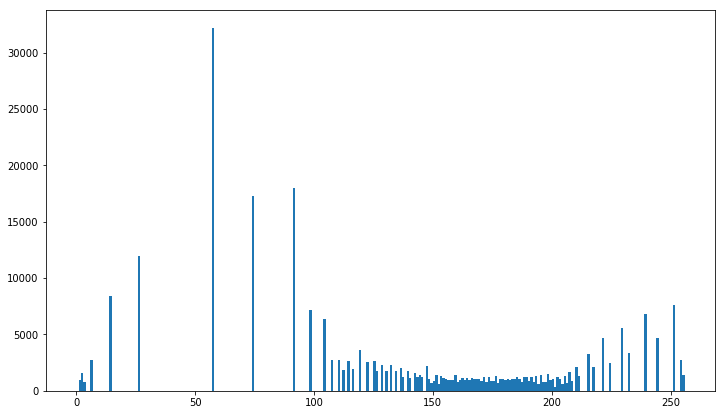

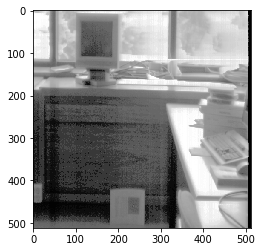

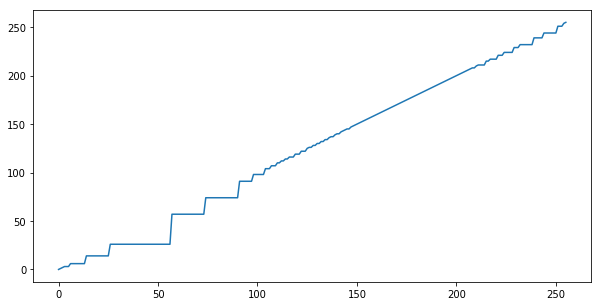

In [6]:
img3,hist3,func3 = eq_img(img2, hist2)

##  Filtrado

Para realizar las convoluciones utiliza la función ``convolve`` o ``convolve1d`` de ``scipy.ndimage.filters``,
segun corresponda.


Carga y muestra las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` que están contaminadas respectivamente
con ruido de tipo gaussiano e impulsional. En los siguientes ejercicios también puedes utilizar otras imágenes que te parezcan interesantes.

**Ejercicio 3.** Escribe una función ``masc_gaus(sigma, n)``
que construya una máscara de una dimensión de un filtro
gaussiano de tamaño *n* y varianza σ . Filtra las imágenes
anteriores con filtros bidimensionales de diferentes tamaños
de *n* , y/o σ.

En este ejercicio tienes que implementar la función que construye la máscara. No puedes usar funciones que construyan la máscara o realicen el filtrado automáticamente.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.



**Ejercicio 4.** Escribe una función ``masc_deriv_gaus(sigma, n)`` que construya una máscara de una dimensión de un
filtro derivada del gaussiano de tamaño *n* y varianza σ. Filtra la imagen ``corridor.jpg`` con filtros bidimensionales de derivada
del gaussiano para extraer los bordes de la imagen. Prueba con diferentes valores de *n* y/o σ.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.

**Ejercicio 5.** Compara los tiempos de ejecución de las convoluciones anteriores cuando se realizan con ``convolve1d`` en vez de con ``convolve``.
Analiza los tiempos para diferentes valores de *n* y justifica los resultados.

In [ ]:
# Posible ejemplo de código
import time

start_time = time.clock()
# ejecuta convoluciones ....

print time.clock() - start_time, "seconds"

**Ejercicio 6.** Aplica el filtro de la mediana a las imágenes
``escgaus.bmp`` y ``escimp5.bmp`` con diferentes valores de tamaño de la ventana. Muestra y discute los resultados. Compáralos con los obtenidos en el Ejercicio 3.

Para realizar este ejercicio puedes utilizar la función ``cv2.medianBlur()`` de OpenCV, ``scipy.ndimage.median_filter()`` de SciPy o hacer tu propia función. Para ello puedes escribir una función ``mediana(img, n)`` y aplicarla a la imagen con la función ``scipy.ndimage.filters()``.



**Ejercicio 7.** Utiliza la funcion ``cv2.bilateralFilter()`` de OpenCV para realizar el filtrado bilateral de una
imagen. Selecciona los parámetros adecuados y aplícalo a las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` y otras que elijas tú.

Si llamamos $\sigma_r$ a la varianza de de la gaussiana que controla la ponderación debida a la diferencia entre los valores de los píxeles y $\sigma_s$ a la varianza de la gaussiana que controla la ponderación debida a la posición de los píxeles. Responde a la siguientes preguntas:
* ¿Cómo se comporta el filtro bilateral cuando la varianza $\sigma_r$ es muy alta? ¿En este caso qué ocurre si $\sigma_s$ es alta o baja?
* ¿Cómo se comporta si $\sigma_r$ es muy baja? ¿En este caso cómo se comporta el filtro dependiendo si $\sigma_s$ es alta o baja?

Muestra y discute los resultados para distintos valores de los parámetros y varias aplicaciones sucesivas del filtro. Compáralos con los obtenidos en los Ejercicios 3 y 6.

## Transformada Hough

**Ejercicio 8.** Emplea la transformada Hough para encontrar segmentos rectilíneos en la imagen ``corridor.jpg``. Para extraer los bordes de la imagen utiliza las funciones escritas en los ejercicios 3 y 4. Utiliza la función ``cv2.HoughLinesP()`` de OpenCV.

Discute el funcionamiento para distintos valores de los parámetros de la función, así como de
los filtros utilizados para extraer los bordes de la imagen. Pinta los resultados sobre la imagen (mira como ejemplo, https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html).

## Segmentación

**Ejercicio 9.** Escribe una función que segmente el objeto central de una imagen a partir de una segmentación manual
inicial realizada por el usuario. Puedes utilizar el código proporcionado en el archivo segm.py. En la optimización
1. toma como afinidad entre una pareja de píxeles la
diferencia en sus valores de color y;
2. sólo establece los términos unitarios de los píxeles
marcados por el usuario.

Aplícalo, al menos, a las imágenes ``persona.png`` y ``horse.jpg``. Muestra y discute los resultados.

**Ejercicio 10.** Mejora el algoritmo anterior. Puedes utilizar algunas de las que te sugiero a continuación u otras que creas más convenientes:
* Refina la segmentación iterativamente.
* Mejora la función de afinidad entre píxeles.
* Mejora los términos unitarios

mejora los resultados de algunas de las imágenes anteriores. Muestra y discute los resultados.